In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [2]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [29]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 1. 선형 회귀 모델

+ hypothesis : y = w[0] * x[0] + w[1] * x[1] + ... + b


+ 일반 선형회귀 모델
+ 릿지 선형회귀 모델
+ 라쏘 선형회귀 모델
+ 엘라스틱넷 선형회귀 모델 : 릿지 + 라쏘

w[0]: 0.393906  b: -0.031804


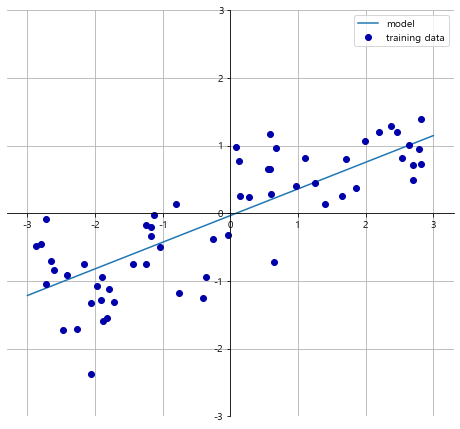

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.6700890315075756
테스트 점수 :  0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [13]:
##### 통계적 접근

from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train.reshape(-1))
result

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865)

#### 1) 사례 1 : 전기 생산량과 소비량

+ 귀무 가설 : 전기 생산량과 소비량은 상관 관계가 없다.
+ 대립 가설 : 전기 생산량과 소비량은 상관 관계가 있다.

In [14]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [15]:
### 통계적 분석

result = stats.linregress(X, y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [16]:
### 머신 러닝

X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

기울기 : [0.49560324], 절편 : 0.919581428068942


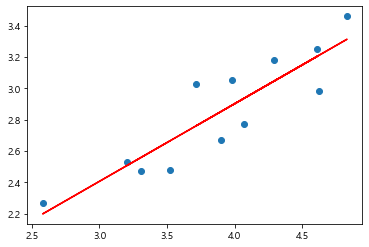

In [19]:
plt.scatter(X, y)
plt.plot(X, lr.coef_ * X + lr.intercept_, c="red")

In [22]:
### 생산량이 5일때 사용량은 얼마일까?

print(lr.coef_ * 5 + lr.intercept_)
print(lr.predict([[5]]))

[3.39759761]
[3.39759761]


#### 2) 사례 2 : 보스턴 주택 가격

In [38]:
boston = load_boston()
print(boston.data.shape)
# print(boston.target)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


#### 3) 고차원 특성에 대한 과적합

In [41]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

(506, 104)
훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665803


### (1) 릿지(Ridge) 회귀 모델

+ L2 규제(Regularization)
+ MSE항에 Penelty항을 추가
+ 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소, 모델이 단순), 작게하면 그 반대가 된다.
+ 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충하는 효과

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha=1.0

print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744752


In [43]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 점수 : ", ridge10.score(X_train, y_train))
print("테스트 점수 : ", ridge10.score(X_test, y_test))

훈련 점수 :  0.7882787115369616
테스트 점수 :  0.6359411489177311


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 점수 : ", ridge01.score(X_train, y_train))
print("테스트 점수 : ", ridge01.score(X_test, y_test))

훈련 점수 :  0.9282273685001985
테스트 점수 :  0.7722067936479811


(-25.0, 25.0)

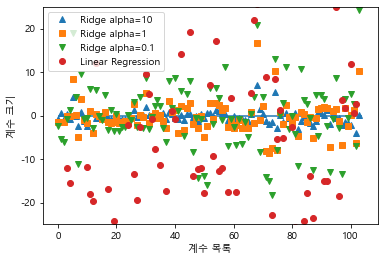

In [53]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="Linear Regression")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

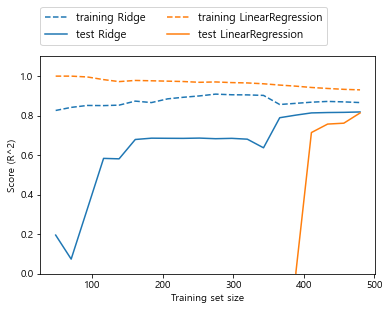

In [54]:
# 알파값을 1로 고정한 상태에서 데이터의 크기 조절

mglearn.plots.plot_ridge_n_samples()

In [56]:
print("사용한 특성의 수 : ", np.sum(ridge.coef_ != 0))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

사용한 특성의 수 :  104
사용한 특성의 수 :  104
사용한 특성의 수 :  104


### (2) 라쏘(Lasso) 회귀 모델

+ L1 규제 사용
+ 알파를 크게 하면 페널티의 효과가 커지고 작게하면 그 반대가 된다.
+ 특성 선택이 자동적으로 이루어진다.

In [57]:
from sklearn.linear_model import Lasso

In [59]:
lasso = Lasso().fit(X_train, y_train) # alpha=1.0

print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0))

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [60]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

print("훈련 점수 : ", lasso001.score(X_train, y_train))
print("테스트 점수 : ", lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 점수 :  0.8961122320864717
테스트 점수 :  0.7677995670886713
사용한 특성의 수 :  32


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [61]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)

print("훈련 점수 : ", lasso00001.score(X_train, y_train))
print("테스트 점수 : ", lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 점수 :  0.9420931515237063
테스트 점수 :  0.6976541391663642
사용한 특성의 수 :  100


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


<ipython-input-66-f2e0e8671955>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(ridge01.coef_, "o", Label="Ridge alpha=0.1")


(-25.0, 25.0)

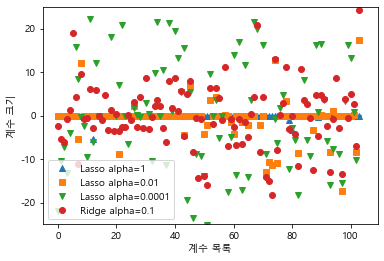

In [66]:
plt.plot(lasso.coef_, "^", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "s", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "o", Label="Ridge alpha=0.1")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

### (3) 예제1 

+ 키에 따라 몸무게가 얼마인지 예측하는 프로그램 작성

In [71]:
df = pd.read_csv("data/heights.csv")
df

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


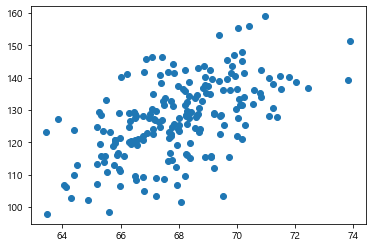

In [72]:
X = df["height"]
y = df["weight"]

plt.plot(X, y, "o")

In [73]:
result = stats.linregress(X, y)
result

LinregressResult(slope=3.432676129271628, intercept=-106.02770644878126, rvalue=0.5568647346122992, pvalue=1.1029015151266264e-17, stderr=0.3638682118583795)

In [74]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [75]:
### 키가 70인 사람의 몸무게는 얼마일까?
lr.predict([[70]])

array([134.2596226])

In [78]:
lr.score(X.values.reshape(-1, 1), y)

0.31009833265482645

### (4) 예제2

+ Boston Housing Sample

In [4]:
"""
속성	내용
-----------------
CRIM	범죄율
ZN	25,000평방피트당 주거지역의 비율
INDUS	비소매 상업지구 비율(단위: 에이커)
CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
NOX	일산화질소 농도(단위:0.1ppm)
RM	주택당 방의 수
AGE	1940년 이전에 건설된 주택의 비율
DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
RAD	고속도로 접근성
TAX	재산세율
PTRATIO	학생/교사비율
B	흑인비율
LSTAT	하위계층비율
MEDV	타운의 주택 가격 중앙값(단위: 1,000달러
"""
boston = load_boston()
boston

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [94]:
boston_model = LinearRegression()
boston_model.fit(X_train, y_train)

LinearRegression()

In [95]:
print("훈련 점수 : ", boston_model.score(X_train, y_train))
print("테스트 점수 : ", boston_model.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

df["MEDV"] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


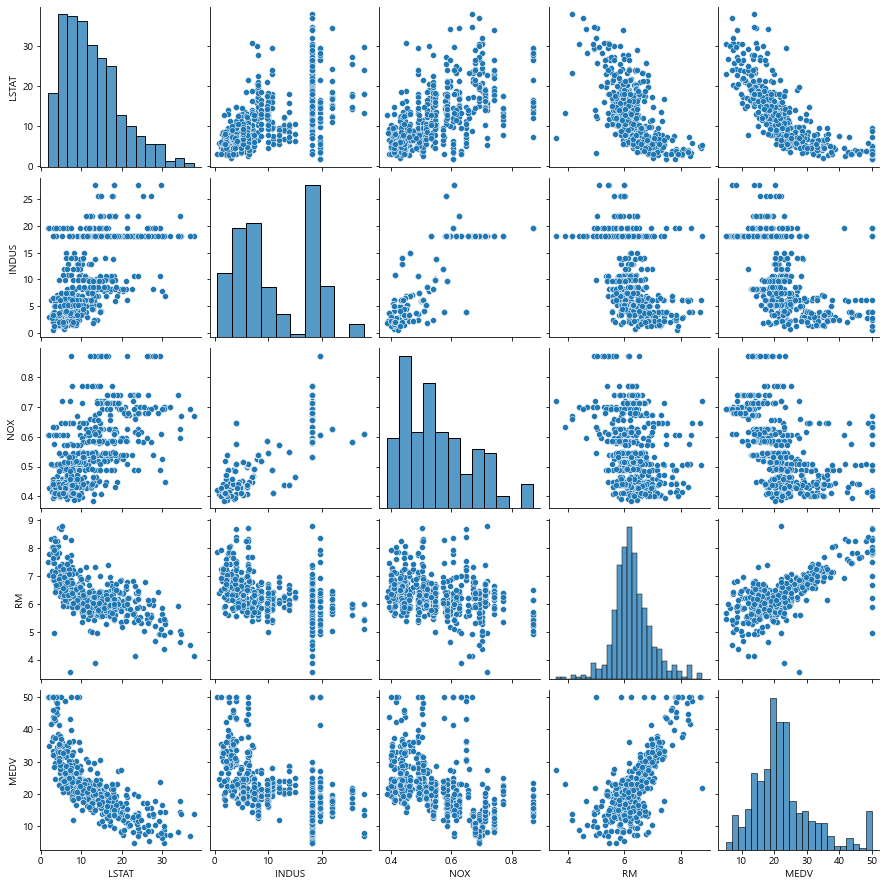

In [104]:
sns.pairplot(df[["LSTAT", "INDUS", "NOX", "RM", "MEDV"]], size=2.5)

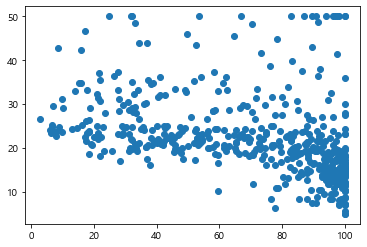

In [105]:
plt.scatter(df[["AGE"]], df[["MEDV"]])

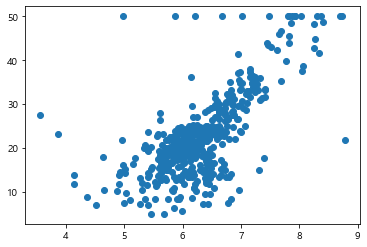

In [108]:
plt.scatter(df[["RM"]], df[["MEDV"]])

<AxesSubplot:>

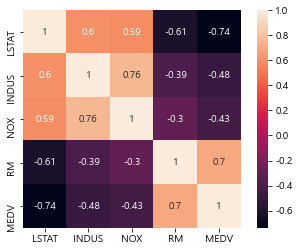

In [113]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
heat = np.corrcoef(df[cols].values.T)
sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols, square=True)

In [8]:
### 방이 10개일때 집값은 얼마인가?

X = df[["RM"]].values
y = df[["MEDV"]].values

lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

house_price = lr.predict([[4]])
print("방이 [%d]인 주택가격은 약 [%.1f] 달러이다." %(4, house_price*1000))

[[9.10210898]] [-34.67062078]
방이 [4]인 주택가격은 약 [1737.8] 달러이다.


### (5) 예제3

+ Manhattan Housing Sample

In [ ]:
"""
rental_id	rental ID
rent	임대료 ($)
bedrooms	침실수
bathrooms	화장실수
size_sqft	평수(feet)
min_to_subway	지하철과의 거리 (minutes)
floor	층수
building_age_yrs	건물 연령
no_fee	중계수수료 (0 for fee, 1 for no fee)
has_roofdeck	옥상 (o for no, 1 for yes)
has_washer_dryer	세탁기/건조기 (0/1)
has_doorman	도어맨 (0/1)
has_elevator	엘리베이터 (0/1)
has_dishwasher	식기세척기 (0/1)
has_patio	안마당(patio) (0/1)
has_gym	헬스장(gym) (0/1)
neighborhood	이웃 (ex: 한인타운)
submarket	submarket (ex: North Brooklyn)
borough	borough (ex: Brooklyn)
"""

In [ ]:
#### 변수들의 관계를 시각화
#### 설명계수(훈련 결과와 테스트 결과 비교)
#### 필요할 경우 릿지나 라쏘 구현
#### 임대료 계산

In [23]:
df = pd.read_csv("data/manhattan.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [13]:
X = df[["bedrooms", "bathrooms", "size_sqft", "min_to_subway", "floor",
        "building_age_yrs", "no_fee", "has_roofdeck", "has_washer_dryer", "has_doorman",
        "has_elevator", "has_dishwasher", "has_patio", "has_gym"]]

y = df[["rent"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

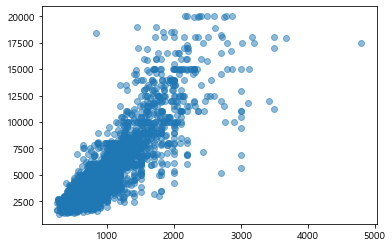

In [15]:
plt.scatter(df[["size_sqft"]], df[["rent"]], alpha=0.5)

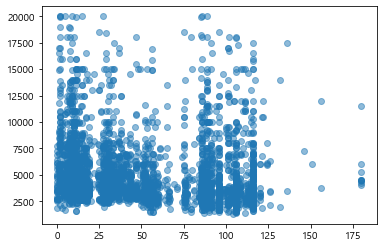

In [16]:
plt.scatter(df[["building_age_yrs"]], df[["rent"]], alpha=0.5)

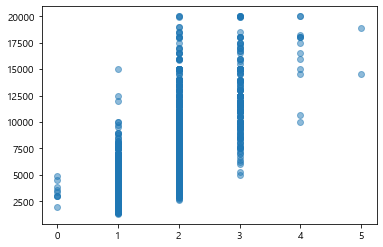

In [17]:
plt.scatter(df[["bathrooms"]], df[["rent"]], alpha=0.5)

In [18]:
lr = LinearRegression().fit(X_train, y_train)

In [20]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.782864838470885
0.7616959930542468


In [21]:
my_rent = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
print("주택 대여료는 ", lr.predict(my_rent))

주택 대여료는  [[2309.07232733]]


---

# 2. 로지스틱 회귀 모델

+ L2 norm 규제 사용
+ C 파라미터를 사용해서 규제의 강도를 설정

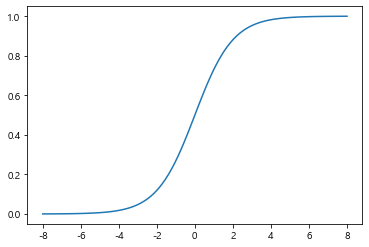

In [26]:
##### Sigmoid 그래프 그리기

def sigmoid(x):
    result = []
    
    for i in x:
        result.append(1/(1 + np.exp(-i)))
        
    return result
##############################################

X = np.linspace(-8, 8, 100)
X

sig = sigmoid(X)

plt.plot(X, sig)

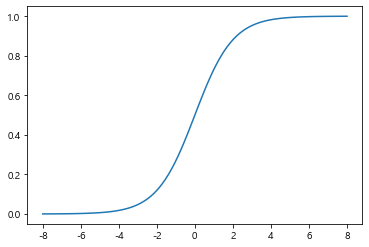

In [28]:
X = np.linspace(-8, 8, 100)
plt.plot(X, 1/(1 + np.exp(-X)))

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\acorn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


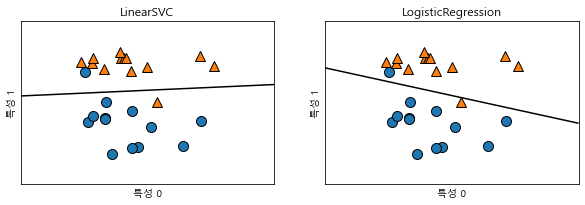

In [35]:
X, y = mglearn.datasets.make_forge()

_, axes = plt.subplots(1, 2, figsize=(10, 3))

# clf1 = LinearSVC(C=1).fit(X, y)
# clf2 = LogisticRegression(C=1).fit(X, y)

# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
# mglearn.plots.plot_2d_separator(clf1, X, ax=axes[0])

# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
# mglearn.plots.plot_2d_separator(clf2, X, ax=axes[1])

for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes):
    clf = model.fit(X, y)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

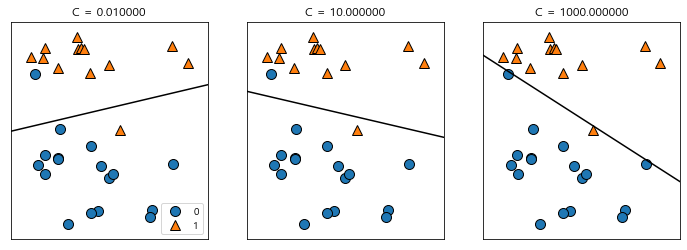

In [36]:
mglearn.plots.plot_linear_svc_regularization()

### (1) C 값에 따른 결과

In [37]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [39]:
logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000).fit(X_train, y_train)
print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.960093896713615
테스트 점수 :  0.965034965034965


In [40]:
logreg100 = LogisticRegression(C=100, penalty="l2", max_iter=10000).fit(X_train, y_train)
print("훈련 점수 : ", logreg100.score(X_train, y_train))
print("테스트 점수 : ", logreg100.score(X_test, y_test))

훈련 점수 :  0.9765258215962441
테스트 점수 :  0.965034965034965


In [47]:
logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=10000).fit(X_train, y_train)
print("훈련 점수 : ", logreg001.score(X_train, y_train))
print("테스트 점수 : ", logreg001.score(X_test, y_test))

훈련 점수 :  0.9460093896713615
테스트 점수 :  0.972027972027972


(-5.0, 5.0)

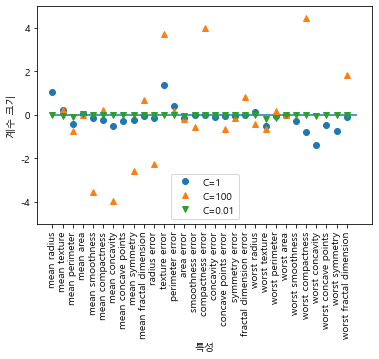

In [48]:
plt.plot(logreg.coef_.T, "o", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg001.coef_.T, "v", label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.legend()
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

In [49]:
logreg_l1 = LogisticRegression(C=1, penalty="l1", max_iter=10000,
                              solver="liblinear").fit(X_train, y_train)
print("훈련 점수 : ", logreg_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.951048951048951


In [50]:
logreg100_l1 = LogisticRegression(C=100, penalty="l1", max_iter=10000,
                              solver="liblinear").fit(X_train, y_train)
print("훈련 점수 : ", logreg100_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg100_l1.score(X_test, y_test))

훈련 점수 :  0.9882629107981221
테스트 점수 :  0.972027972027972


In [51]:
logreg001_l1 = LogisticRegression(C=0.01, penalty="l1", max_iter=10000,
                              solver="liblinear").fit(X_train, y_train)
print("훈련 점수 : ", logreg001_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg001_l1.score(X_test, y_test))

훈련 점수 :  0.9107981220657277
테스트 점수 :  0.951048951048951


### (2) KNN, LogisticRegression, LinearSVC 성능 비교

In [60]:
cancer.data.shape
cancer.feature_names
cancer.target_names # malignant(악성), benign(양성)
np.bincount(cancer.target)
#cancer.target[cancer.target==0].shape

In [81]:
##### LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.965034965034965


In [82]:
##### LinearSVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

model = LinearSVC(max_iter=10000, dual=False).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.958041958041958


In [83]:
##### KNN
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

model = KNeighborsClassifier().fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.965034965034965


([<matplotlib.axis.XTick at 0x23d5e4614c0>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, '

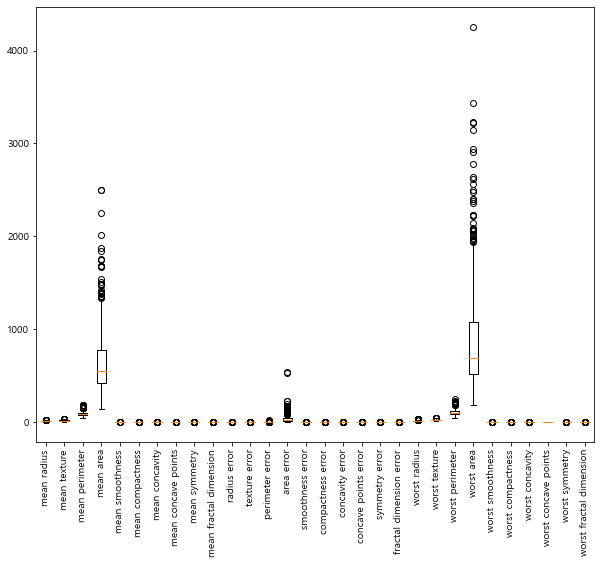

In [84]:
##### 이상치

plt.figure(figsize=(10, 8))
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [85]:
##### Standardization

m = cancer.data.mean(axis = 0)
s = cancer.data.std(axis = 0)

data1 = (cancer.data - m) / s

([<matplotlib.axis.XTick at 0x23d5e750b50>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, '

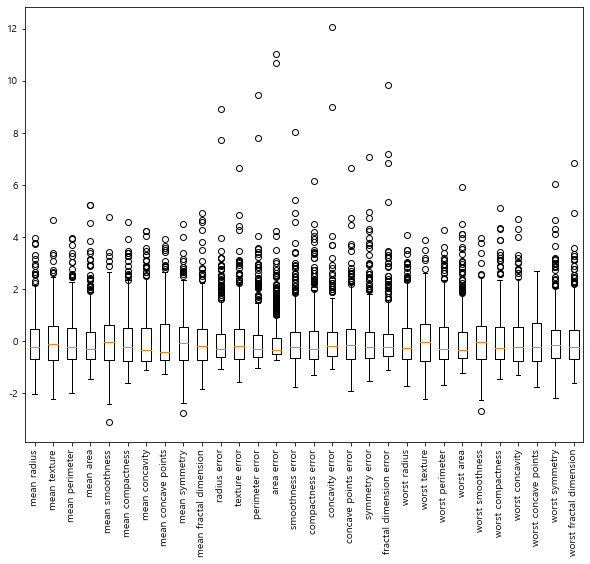

In [86]:
plt.figure(figsize=(10, 8))
plt.boxplot(data1)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [87]:
##### LogisticRegression에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)

model = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.9790209790209791


In [88]:
##### LinearSVC에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)

model = LinearSVC(max_iter=10000, dual=False).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.965034965034965


In [89]:
##### KNN에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)

model = KNeighborsClassifier().fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.958041958041958


In [95]:
##### C값 조정

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)

model = LogisticRegression(C=0.1, max_iter = 10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print(scores)

0.986013986013986


In [107]:
##### C값 조정

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=42)

model = LinearSVC(C=0.01, max_iter=10000, dual=False).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.993006993006993


---

# 3. 다중 클래스 분류

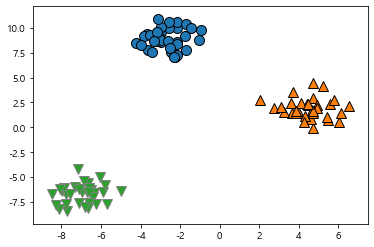

In [109]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [110]:
model = LinearSVC().fit(X, y)
print(model.coef_)

[[-0.17492825  0.23140145]
 [ 0.47621321 -0.06937628]
 [-0.18914213 -0.20399601]]


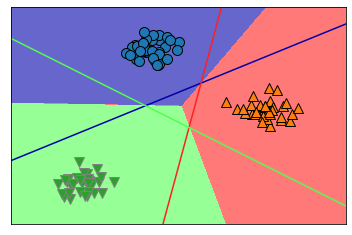

In [114]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
xline = np.linspace(-15, 15)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    plt.plot(xline, -(xline*coef[0] + intercept) / coef[1], c=color)
    
mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=0.6)

---

# 4. 평가

+ 정확도(Accuracy)
+ 정밀도(Precision)
+ 재현율(Recall)
+ F1 score
+ ROC, AUC
+ 오차 행렬(Confusion Matrix)

### (1) 정확도

+ 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [119]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.data)
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [123]:
digits.target == 7

array([False, False, False, ..., False, False, False])

0    1618
1     179
dtype: int64
1347 450
0    409
1     41
dtype: int64


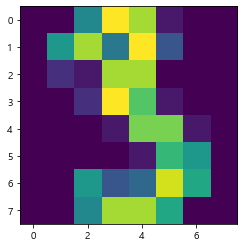

In [138]:
y = (digits.target == 7).astype(int)
print(pd.Series(y).value_counts())

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)

print(len(X_train), len(X_test))
print(pd.Series(y_test).value_counts())

plt.imshow(digits.data[3].reshape(8, 8))

In [ ]:
from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)